# 2. Manejo de información geo-referenciada (Python script)

Usted debe trabajar con información cartográfica del Censo 2017. El archivo shapefile respectivo está en la carpeta 5 Informacion Cartografica Shape. La información geográfica de los centros de salud mental para Lima está en el siguiente excel Salud mental peru.xls.


#### - Subir la base de datos de las manzanas en formate GeodataFrame. Crear los centroides de las manzanas.

In [1]:
# import package pandas, geopandas, plots

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os 
import seaborn as sns
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon


In [2]:
import contextily as cx  # import street map
from pyproj import CRS

C:\Users\Win10\anaconda3\envs\geo_env\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [3]:
district = ['ATE','BARRANCO','BREÑA', 'CALLAO', 'CARABAYLLO','CHORRILLOS','COMAS','EL_AGUSTINO','INDEPENDENCIA',
           'JESUS_MARIA','LA_MOLINA_LIMA','LA_VICTORIA','LIMA','LINCE','LOS_OLIVOS_LIMA','MAGDALENA_DEL_MAR',
           'MIRAFLORES','PUEBLO_LIBRE','PUENTE_PIEDRA', 'RIMAC_LIMA','SAN_BORJA','SAN_ISIDRO','SAN_JUAN_DE_LURIGANCHO','SAN_JUAN_DE_MIRAFLORES','SAN_LUIS',
            'SAN_MARTIN_DE_PORRES','SAN_MIGUEL','SANTA_ANITA','SURCO','VILLA_EL_SALVADOR','VILLA_MARIA_DEL_TRIUNFO']


In [4]:
# subir la informacion cartográfica
data_file = r"1ECO35_R_PYTHON/data/Trabajo_final/5_Informacion_Cartografica-Shape/"
 

i = 0

for j in district:
        i = i + 1
        globals()[f'manzana{i}']  = gpd.read_file(f'{data_file}{j}/{j}.shp')
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'][['Mz','geometry','UBIGEO']]
        globals()[f'manzana{i}'] = globals()[f'manzana{i}'].rename(columns = {"Mz":"id_manzana"})

manzana = manzana1.copy()

# manzana <- Fmapa
for k in range(2,i+1):
    manzana = manzana.append(globals()[f'manzana{k}'] , ignore_index=True)

C:\Users\Win10\AppData\Local\Temp\ipykernel_7440\2203659508.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  manzana = manzana.append(globals()[f'manzana{k}'] , ignore_index=True)


In [5]:
#manzanas -> verificar duplicados
manzana['bool_series'] = manzana.duplicated(["id_manzana"])

In [6]:
# 670 duplicates id_manzana that share same coordinates, hence I dropped repeated 
manzana[manzana['bool_series'] == 1]
manzana = manzana[manzana['bool_series'] == 0]
manzana.head(10)

,id_manzana,geometry,UBIGEO,bool_series
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,False
1,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,False
2,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103,False
3,150103000102900018,"POLYGON ((-76.92292 -12.02466, -76.92240 -12.0...",150103,False
4,150103000103800056,"POLYGON ((-76.89258 -12.03403, -76.89291 -12.0...",150103,False
5,150103000103500008U,"POLYGON ((-76.90314 -12.03981, -76.90324 -12.0...",150103,False
6,150103000102900026,"POLYGON ((-76.92142 -12.02517, -76.92142 -12.0...",150103,False
7,150103000106400045N,"POLYGON ((-76.81389 -12.01049, -76.81369 -12.0...",150103,False
8,150103000103701028B,"POLYGON ((-76.89854 -12.03198, -76.89838 -12.0...",150103,False
9,150103000101800049,"POLYGON ((-76.91447 -12.04442, -76.91423 -12.0...",150103,False


In [7]:
## proyectar de un sistema a otro bidimensional
manzana = manzana.to_crs( epsg = 24891 )


In [8]:
manzana.head(10)

,id_manzana,geometry,UBIGEO,bool_series
0,150103000108200012,"POLYGON ((622937.131 757381.076, 622958.854 75...",150103,False
1,150103000104101040,"POLYGON ((615405.027 758304.687, 615405.712 75...",150103,False
2,150103000101800006,"POLYGON ((612254.645 756482.774, 612268.105 75...",150103,False
3,150103000102900018,"POLYGON ((611938.161 758440.270, 611994.254 75...",150103,False
4,150103000103800056,"POLYGON ((615233.880 757359.292, 615197.227 75...",150103,False
5,150103000103500008U,"POLYGON ((614073.352 756733.548, 614062.488 75...",150103,False
6,150103000102900026,"POLYGON ((612100.838 758382.407, 612100.847 75...",150103,False
7,150103000106400045N,"POLYGON ((623851.167 759853.886, 623873.281 75...",150103,False
8,150103000103701028B,"POLYGON ((614586.750 757594.660, 614603.466 75...",150103,False
9,150103000101800049,"POLYGON ((612830.893 756238.887, 612856.720 75...",150103,False


In [9]:
# Creación de los centroides de las manzanas.
manzana['centroid'] = manzana['geometry'].centroid

In [10]:
manzana

,id_manzana,geometry,UBIGEO,bool_series,centroid
0,150103000108200012,"POLYGON ((622937.131 757381.076, 622958.854 75...",150103,False,POINT (622940.916 757365.538)
1,150103000104101040,"POLYGON ((615405.027 758304.687, 615405.712 75...",150103,False,POINT (615379.507 758293.464)
2,150103000101800006,"POLYGON ((612254.645 756482.774, 612268.105 75...",150103,False,POINT (612284.060 756465.468)
3,150103000102900018,"POLYGON ((611938.161 758440.270, 611994.254 75...",150103,False,POINT (611966.987 758434.831)
4,150103000103800056,"POLYGON ((615233.880 757359.292, 615197.227 75...",150103,False,POINT (615218.752 757375.863)
...,...,...,...,...,...
87854,150143000103400036D,"POLYGON ((610201.933 742466.134, 610201.857 74...",150143,False,POINT (610190.729 742450.098)
87855,150143000104600043L,"POLYGON ((612254.850 742730.233, 612254.687 74...",150143,False,POINT (612254.684 742703.332)
87856,150143000106800020,"POLYGON ((612656.710 738235.394, 612640.604 73...",150143,False,POINT (612634.601 738209.776)
87857,150143000108000026,"POLYGON ((613214.129 736259.292, 613209.173 73...",150143,False,POINT (613165.449 736253.617)


In [11]:
#abrimos la base de datos de los centros de salud mental en excel

salud_mental = pd.read_excel(r"1ECO35_R_PYTHON/data/Trabajo_final/Salud_mental_peru.xls")
                           
                             #r'../../data/Trabajo_final/Salud_mental_peru.xls'

In [12]:
salud_mental

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496


In [13]:
#Cambiamos tipo de variable de string a float para calcular el point.
salud_mental['lat_original'] = salud_mental['lat_original'].astype(str).astype(float)
salud_mental['long_original'] = salud_mental['long_original'].astype(str).astype(float)
#salud_mental

In [14]:
salud_mental['location'] = [Point(xy) for xy in zip(salud_mental.long_original, salud_mental.lat_original)]

In [15]:
#salud_mental['location'] = salud_mental['location'].astype(float).astype(str)

In [16]:
salud_mental['location']

0                POINT (-77.00095 -12.017282)
1             POINT (-76.9482472 -12.1366584)
2               POINT (-76.999385 -12.107663)
3       POINT (-77.00559699999999 -12.062212)
4               POINT (-77.035523 -12.066349)
5       POINT (-76.82314700000001 -12.333766)
6           POINT (-77.02954497 -12.02941578)
7              POINT (-77.0456523 -11.934511)
8             POINT (-76.9644885 -12.1860858)
9       POINT (-77.01337495999999 -12.071416)
10            POINT (-77.0810609 -11.9773149)
11              POINT (-76.885043 -12.094998)
12    POINT (-76.82504093999999 -12.01673871)
13          POINT (-77.00244761 -12.03286184)
14          POINT (-76.94220124 -12.08729942)
15      POINT (-76.81750599999999 -12.112567)
16            POINT (-77.1255055 -11.7099743)
17          POINT (-77.12550653 -11.94169396)
18          POINT (-77.00966007 -12.19191626)
19              POINT (-77.075281 -11.868171)
20          POINT (-76.97877609 -12.20101238)
21     POINT (-76.94234040000001 -

In [17]:
# Declaramos a la base de datos salud_mental como geodataframe
#salud = gpd.GeoDataFrame(salud_mental, geometry='location')
salud = gpd.GeoDataFrame(salud_mental, geometry='location', crs = {'init':'epsg:4326'})

C:\Users\Win10\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [18]:
#obtenemos la variable location como geometry dtype.
salud['location']

0     POINT (-77.00095 -12.01728)
1     POINT (-76.94825 -12.13666)
2     POINT (-76.99939 -12.10766)
3     POINT (-77.00560 -12.06221)
4     POINT (-77.03552 -12.06635)
5     POINT (-76.82315 -12.33377)
6     POINT (-77.02954 -12.02942)
7     POINT (-77.04565 -11.93451)
8     POINT (-76.96449 -12.18609)
9     POINT (-77.01337 -12.07142)
10    POINT (-77.08106 -11.97731)
11    POINT (-76.88504 -12.09500)
12    POINT (-76.82504 -12.01674)
13    POINT (-77.00245 -12.03286)
14    POINT (-76.94220 -12.08730)
15    POINT (-76.81751 -12.11257)
16    POINT (-77.12551 -11.70997)
17    POINT (-77.12551 -11.94169)
18    POINT (-77.00966 -12.19192)
19    POINT (-77.07528 -11.86817)
20    POINT (-76.97878 -12.20101)
21    POINT (-76.94234 -12.20132)
22    POINT (-77.00098 -12.01734)
23    POINT (-77.03373 -11.90139)
24    POINT (-77.08247 -12.05565)
25    POINT (-77.02001 -12.15927)
26    POINT (-77.05800 -12.06949)
27    POINT (-76.97588 -12.04503)
28    POINT (-77.01574 -12.14695)
29    POINT (-

In [19]:
salud

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,location
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.000950,POINT (-77.00095 -12.01728)
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.948247,POINT (-76.94825 -12.13666)
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385,POINT (-76.99939 -12.10766)
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597,POINT (-77.00560 -12.06221)
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523,POINT (-77.03552 -12.06635)
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147,POINT (-76.82315 -12.33377)
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.029545,POINT (-77.02954 -12.02942)
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.045652,POINT (-77.04565 -11.93451)
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.964489,POINT (-76.96449 -12.18609)
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.013375,POINT (-77.01337 -12.07142)


In [20]:
## proyectar de un sistema a otro bidimensional
salud = salud.to_crs( epsg = 24891 )


In [21]:
#visualizamos si la base de datos salud si cambio a bidimen
print(salud)

   Institución Departamento Provincia                 Distrito  UBIGEO  \
0        MINSA         LIMA      LIMA   SAN JUAN DE LURIGANCHO  150132   
1        MINSA         LIMA      LIMA  VILLA MARIA DEL TRIUNFO  150143   
2        MINSA         LIMA      LIMA                SAN BORJA  150130   
3        MINSA         LIMA      LIMA              LA VICTORIA  150115   
4        MINSA         LIMA      LIMA          CERCADO DE LIMA  150101   
5        MINSA         LIMA      LIMA            PUNTA HERMOZA  150126   
6        MINSA         LIMA      LIMA                    RIMAC  150128   
7        MINSA         LIMA      LIMA                    COMAS  150110   
8        MINSA         LIMA      LIMA        VILLA EL SALVADOR  150142   
9        MINSA         LIMA      LIMA              LA VICTORIA  150115   
10       MINSA         LIMA      LIMA               LOS OLIVOS  150117   
11       MINSA         LIMA      LIMA               PACHACAMAC  150123   
12       MINSA         LIMA      LIMA 

In [22]:
#Creación de un dataframe por cada centro de salud por distrito
list_of_df = []
unique = set(list(salud['Distrito']))
for l in unique:
     list_of_df.append(salud.loc[salud['Distrito'] == l,:])

In [23]:
list_of_df[1]

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,location
12,MINSA,LIMA,LIMA,ATE,150103,-12.016739,-76.825041,POINT (622625.851 759177.482)
31,MINSA,LIMA,LIMA,ATE,150103,-12.055808,-76.952873,POINT (608626.204 755031.786)


In [24]:
list_of_distance = []
for v in range(25):
    list_of_distance.append(list_of_df[v]['location']) 

In [25]:
list_of_distance[1]

12    POINT (622625.851 759177.482)
31    POINT (608626.204 755031.786)
Name: location, dtype: geometry

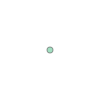

In [26]:
n= list_of_distance[1]
nprueba = n.iloc[1]
nprueba

In [27]:
final = []
for x in range (25):
   #print(x)
    nprueba = list_of_distance[x]
    #rint(nprueba)
    for y in range (len(nprueba)):
       #print (y)
        nprueba1 = nprueba.iloc[y]
        #rint(nprueba1)
        #f len(nprueba) == 1:
        distanceprueba1 = min(manzana['centroid'].distance(nprueba1))
       #salud['distancia_final'] = distanceprueba1distanceprueba1
        print(distanceprueba1)
        #lse:
           #distanceprueba1['distancias_minimas'] = min(manzana['centroid'].distance(nprueba1))
        #rint(salud)
        final.append(distanceprueba1)
    

120.88040217506494
33.603541437083074
118.79012195987617
34.94782122420401
37.476856851817146
13822.41636416144
131.54535981980212
131.25156087331317
33.96204066783059
54.56212000075051
83.15638290703555
95.52212814116406
75.57078368526281
44.79372452940992
22.557778119131783
63.09986888970634
71.83200838181493
27.356874711037865
59.9376830205326
10963.154267527023
35.71018048138021
529.8094978583404
3194.4933191370587
34.37466588070491
61.13174789390187
100.38820130890414
32.80999951655701
60.35977348663681
40.60581321654825
33.30903947240104
21.006658901220064
82.72051170572315
59.87980893565083
7822.996986232981
33.491581749173264
53.95544172741629
109.37538681260213
42.94388836399048


In [28]:
salud['distancia_final'] = final
salud

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,location,distancia_final
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.000950,POINT (603437.655 759367.644),120.880402
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.948247,POINT (609014.162 746066.839),33.603541
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385,POINT (603480.361 749351.628),118.790122
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597,POINT (602867.435 754396.067),34.947821
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523,POINT (599598.335 753979.173),37.476857
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147,POINT (622356.437 724043.002),13822.416364
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.029545,POINT (600301.980 758062.844),131.545360
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.045652,POINT (598677.088 768599.535),131.251561
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.964489,POINT (607172.235 740613.321),33.962041
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.013375,POINT (602006.288 753387.124),54.562120


#### - Crear una variable dummy llamado Treatment que toma el valor de 1 si el centroide de la manzana se ubica a menos de 1 km de algun centro de salud mental.


In [29]:
#dividir los datos de distance entre 1000 para convertir en km 

salud['distance_km'] = salud['distancia_final'] /1000
salud['distance_km']

0      0.120880
1      0.033604
2      0.118790
3      0.034948
4      0.037477
5     13.822416
6      0.131545
7      0.131252
8      0.033962
9      0.054562
10     0.083156
11     0.095522
12     0.075571
13     0.044794
14     0.022558
15     0.063100
16     0.071832
17     0.027357
18     0.059938
19    10.963154
20     0.035710
21     0.529809
22     3.194493
23     0.034375
24     0.061132
25     0.100388
26     0.032810
27     0.060360
28     0.040606
29     0.033309
30     0.021007
31     0.082721
32     0.059880
33     7.822997
34     0.033492
35     0.053955
36     0.109375
37     0.042944
Name: distance_km, dtype: float64

In [30]:
# Creación de la dummy treatment 

salud['treatment'] = np.where((salud['distance_km'] < 1),1, 0)

In [31]:
salud['treatment']

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    1
35    1
36    1
37    1
Name: treatment, dtype: int32

#### - Crear una dummy llamado Control que toma el valor de 1 si la manzana se ubica entre 1 a 2 km del centro de salud mental.

In [32]:
projected_salud = salud.to_crs( epsg = 4326)

In [33]:
salud['control'] = np.where((salud['distance_km'] >= 1) & ((salud['distance_km'] <= 2)), 1, 0)


In [34]:
# Visualización de la variable dummy creada
salud['control']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
Name: control, dtype: int32

In [35]:
# Creacion de dummy para todas las manzanas que no son control ni treatment.
salud['neutral'] = np.where((salud['treatment'] == 0 ) & ((salud['control'] == 0 )), 1, 0)

In [36]:
salud['neutral']

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    1
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    1
34    0
35    0
36    0
37    0
Name: neutral, dtype: int32

#### - Grafique las manzanas treatment en color rojo y en azul las manzanas de control. Mientras de color blanco o neutral, las manzanas que no son control o treatment. Usar como fondo de fondo de la imagen a Google maps. Añada una leyenda al gráfico2 y el siguiente titulo (Mental Health Center - treatment and control). Use hexbin para sombrear las manzanas tratadas, controles y neutrales.

In [37]:
projected_salud = salud.to_crs( epsg = 4326)

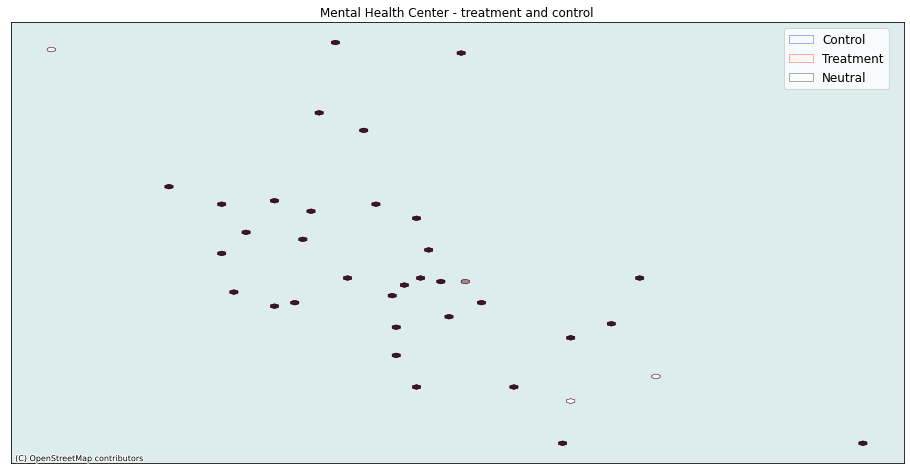

In [54]:
f, ax = plt.subplots(1, figsize=(16,18))

hb2 = ax.hexbin(salud.lat_original, salud.long_original, C = salud['control'], gridsize=100, alpha=0.65, linewidths = 0.5, zorder = 0.5, cmap='Blues', edgecolors = 'blue', label = 'Control')
hb1 = ax.hexbin(salud.lat_original, salud.long_original, C = salud['treatment'], gridsize=100, alpha=0.65, linewidths = 0.5, zorder = 0.5, cmap='Reds', edgecolors = 'red', label = 'Treatment')
hb3 = ax.hexbin(salud.lat_original, salud.long_original, C = salud['neutral'], gridsize=100, alpha=0.65, linewidths = 0.5, zorder = 0.5, cmap='gist_gray', edgecolors = 'black', label = 'Neutral')


cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom = 12)

plt.xticks([])
plt.yticks([])
plt.title('Mental Health Center - treatment and control')
plt.legend(loc='upper right',frameon=True, bbox_to_anchor=(0.99, 1), prop={'size': 12})



In [39]:
#f.savefig('C:\Users\Win10\Documents\GitHub\Nueva carpeta\Map3.png', dpi=800, bbox_inches='tight')
